In [30]:
import pandas as pd
import os
import os.path
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy 
from scipy.signal import find_peaks
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
os.chdir('../')
from AllPackage import *
from AllPackage.Data.PreProcessing import *
os.chdir('./NoteBook')

In [31]:
# leggo i file contunuti nella cartella Campioni_S_11x11 e acquisisco i nomi dei file
pathCampioni = '../Campioni _S_11x11/'
namefiles = [f for f in os.listdir(pathCampioni) if os.path.isfile(os.path.join(pathCampioni, f))]
namefiles

['S2_bkg_mapA_11x11.txt',
 'S1_mapA_11x11.txt',
 'S2_mapA_11x11.txt',
 'S1_bkg_mapA_11x11.txt']

In [32]:
# creo la variabile contenente i nomi delle colonne del pandas dataframe

columns = ['WaveNum']+[f'row{k}_point{i}' for k in range(1,12) for i in range(1,12)]


In [33]:
# creo i pandas dataframe dai file contenuti nella cartella Campioni_S_11x11

#for name in namefiles:
#    globals()['dataset_%s' % name[:-4]] = pd.read_csv('./Campioni _S_11x11/'+namefiles[0], delim_whitespace=True,names = columns)
    
data_S1_bkg = pd.read_csv(pathCampioni+namefiles[0], delim_whitespace=True,names = columns)
data_S1 = pd.read_csv(pathCampioni+namefiles[1], delim_whitespace=True,names = columns)
data_S2_bkg = pd.read_csv(pathCampioni+namefiles[2], delim_whitespace=True,names = columns)
data_S2 = pd.read_csv(pathCampioni+namefiles[3], delim_whitespace=True,names = columns)



In [34]:
#proviamo a fare un po' di preprocessing

S1_bkg_smooth = smooth_filter_savgol(data_S1_bkg,data_S1_bkg.columns)
#plot_spettri_pdf(S1_bkg_smooth,S1_bkg_smooth.columns,'./smooth_pdf/')
#plot_spettri_pdf(data_S1_bkg,data_S1_bkg.columns,'./pdf/')
[peaks_wn, peaks_int] = trova_picchi(data_S1_bkg,data_S1_bkg.columns)
#il trovapicchi sembra essere indip. da l'uso dello smooth
S1_bkg_norm = norm_max_min(S1_bkg_smooth,S1_bkg_smooth.columns)
#prova di trasposizione
S1_bkg_trasp = transpose_df(S1_bkg_norm)
S1_bkg_trasp1 = transpose_df(S1_bkg_smooth)

In [35]:
#%matplotlib inline
#fig = plt.figure();
    
#ax = fig.add_subplot(1, 1, 1);
#ax.plot(S1_bkg_smooth[S1_bkg_smooth.columns[0]],  S1_bkg_smooth[S1_bkg_smooth.columns[59]]);
#ax.scatter(peaks_wn[59],peaks_int[59],color='r',marker='x')
#ax.grid(which='minor', linestyle=':', linewidth=0.5);
#ax.minorticks_on();

#ax.set_title(S1_bkg_smooth.columns[24]);
#ax.set_ylabel('Raman intensity')
#ax.set_xlabel('Raman shift (cm$^{-1}$)')


In [36]:
pca = skl.decomposition.PCA(n_components=3)
StandardScaler = skl.preprocessing.StandardScaler()

In [37]:
StandardScaler.fit_transform(S1_bkg_trasp)
asd = pca.fit(S1_bkg_trasp)

In [38]:
wow = asd.transform(S1_bkg_trasp)
asd.explained_variance_ratio_

array([0.72267085, 0.08827358, 0.04147336])

In [39]:
#esp (la distanza tra punti interni) è il parametro più influente con cui giocare
total_var = []
for i in range(1,10):
    pca = skl.decomposition.PCA(n_components=i)
    StandardScaler.fit_transform(S1_bkg_trasp)
    asd = pca.fit(S1_bkg_trasp)
    wow = asd.transform(S1_bkg_trasp)
    total_var.append(asd.explained_variance_ratio_.sum())
    

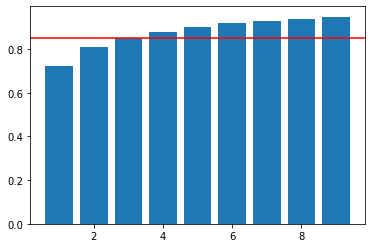

In [40]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
PCs = [x for x in range(1,10)]
ax.bar(PCs,total_var)
plt.axhline(y=0.85 ,color='r')
plt.show()

In [41]:
clusterDB = DBSCAN(eps=3, min_samples=5).fit_predict(wow)
clusterKM = KMeans(n_clusters=5).fit_predict(wow)

In [42]:
color = []
for x in clusterKM:
    if(x==0):
        color.append('r')
    if(x==1):
        color.append('g')
    if(x==2):
        color.append('b')
    if(x==3):
        color.append('y')
    if(x==4):
        color.append('m')
    if(x==-1):
        color.append('k')

In [43]:
len(color)

121

In [44]:
%matplotlib qt

fig = plt.figure();

X=wow[:,0]
Y=wow[:,1]
Z=wow[:,2]

ax = fig.add_subplot(111,projection='3d');
ax.scatter(X, Y, Z, c=color, marker='x')
ax.grid(which='minor', linestyle=':', linewidth=0.5);

ax.minorticks_on();

ax.set_title(S1_bkg_smooth.columns[24]);
ax.set_ylabel('PC1')
ax.set_xlabel('PC0')
ax.set_zlabel('PC2')



Text(0.5, 0, 'PC2')

In [45]:
os.getcwd()

'/home/ksatn/ProgettoDataScience/NoteBook'